In [2]:
import cv2
from matplotlib import pyplot as plt
import numpy as np
import math

In [1]:
# from google.colab import drive
# drive.mount('/content/drive')

In [60]:
from PIL import Image

images = []

for i in range(1, 59):
    image_path = f"C:/Users/Adars/OneDrive/Desktop/Samsung PRISM/Code/END_GAME/data/stike/{i}.jpg""
    image = Image.open(image_path)
    images.append(np.array(image))






In [61]:
len(images)

53

In [62]:
def display(img):
    dpi = 80
    im_data = img

    height, width  = im_data.shape[:2]

    # What size does the figure need to be in inches to fit the image?
    figsize = width / float(dpi), height / float(dpi)

    # Create a figure of the right size with one axes that takes up the full figure
    fig = plt.figure(figsize=figsize)
    ax = fig.add_axes([0, 0, 1, 1])

    # Hide spines, ticks, etc.
    ax.axis('off')

    # Display the image.
    ax.imshow(im_data, cmap='gray')

    plt.show()


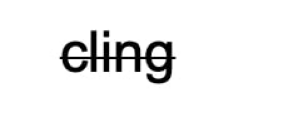

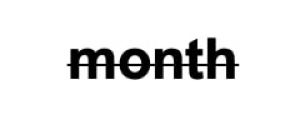

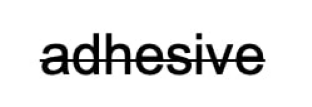

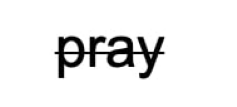

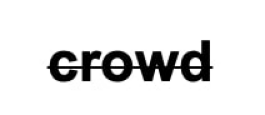

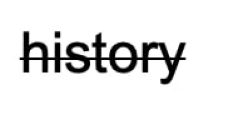

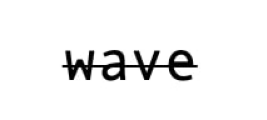

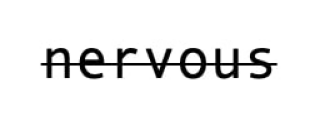

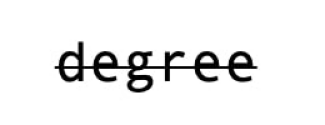

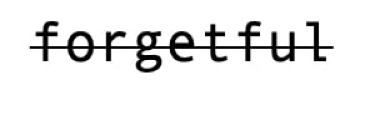

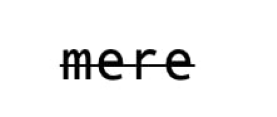

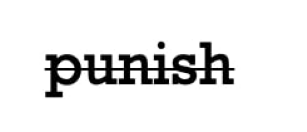

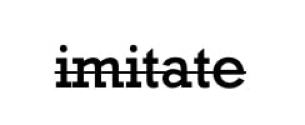

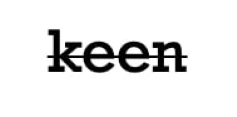

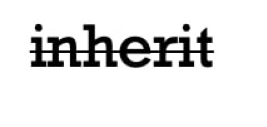

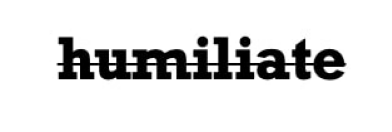

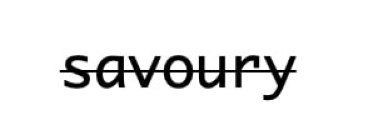

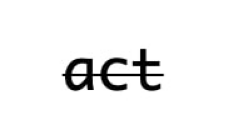

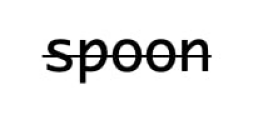

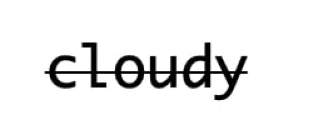

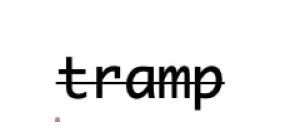

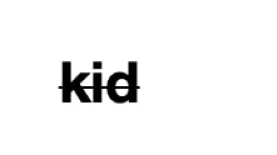

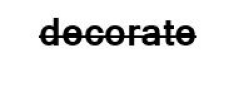

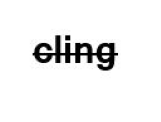

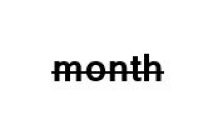

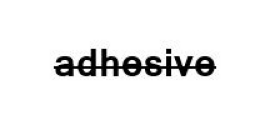

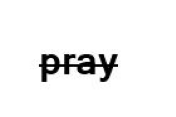

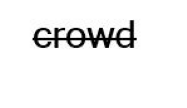

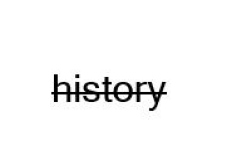

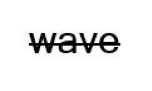

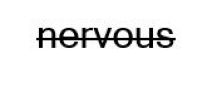

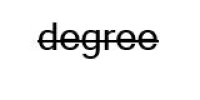

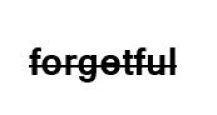

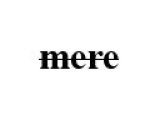

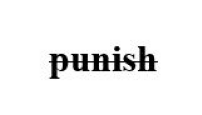

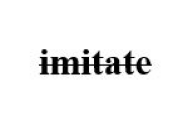

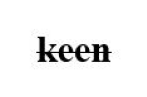

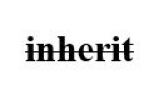

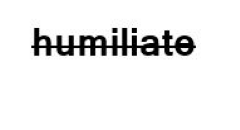

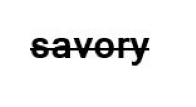

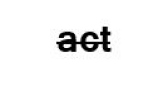

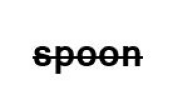

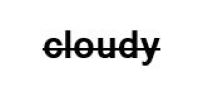

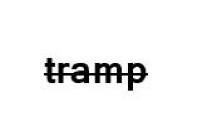

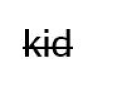

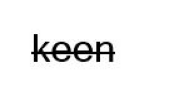

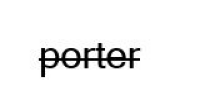

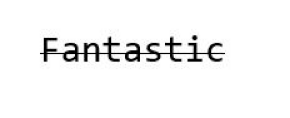

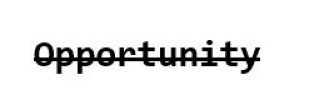

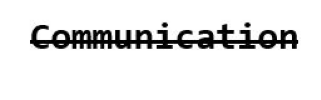

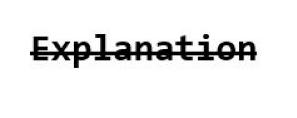

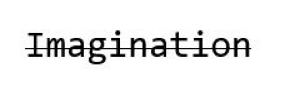

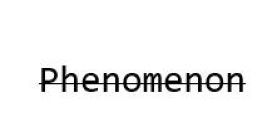

In [63]:
for img in images:
  display(img)

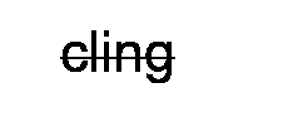

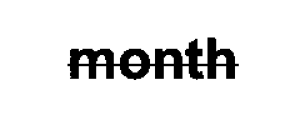

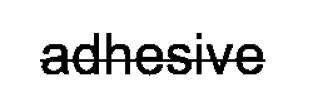

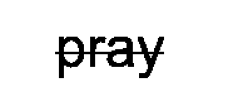

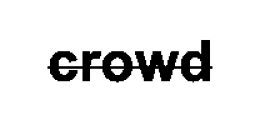

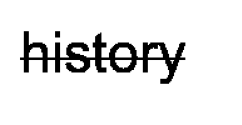

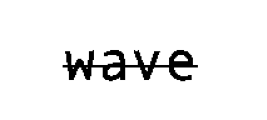

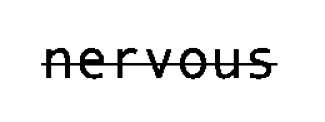

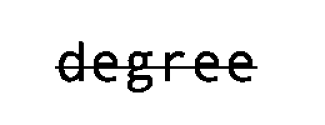

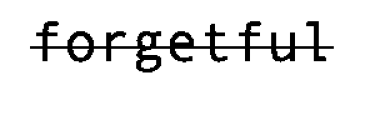

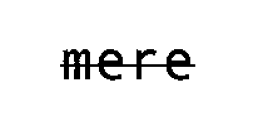

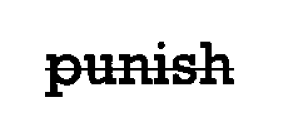

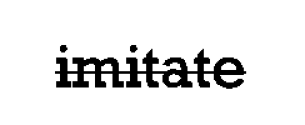

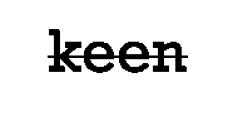

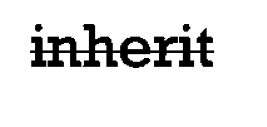

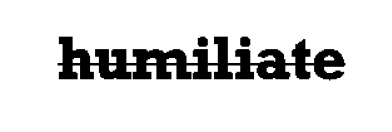

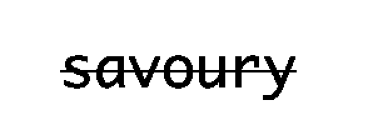

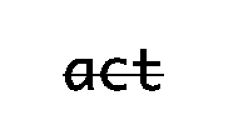

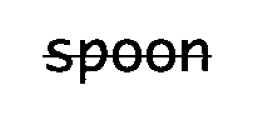

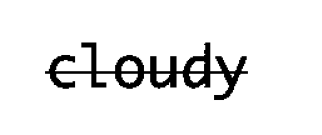

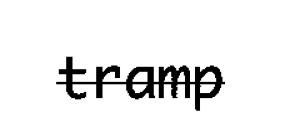

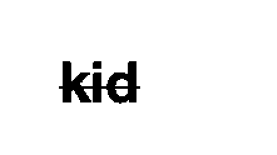

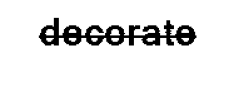

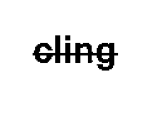

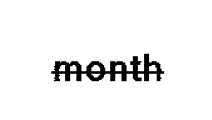

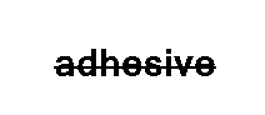

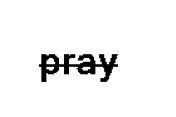

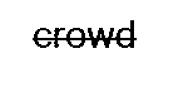

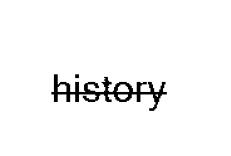

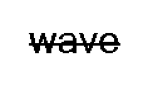

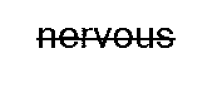

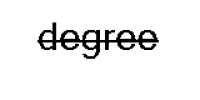

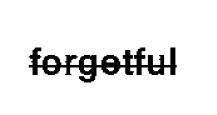

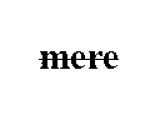

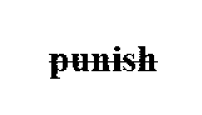

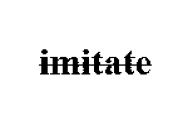

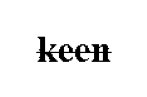

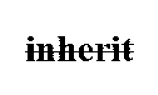

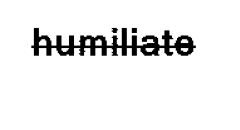

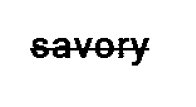

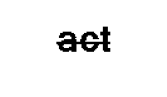

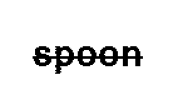

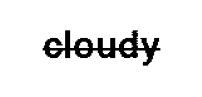

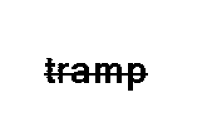

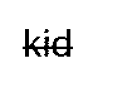

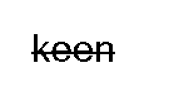

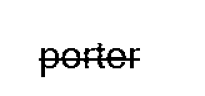

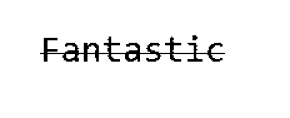

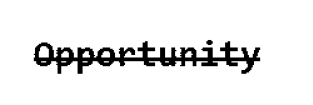

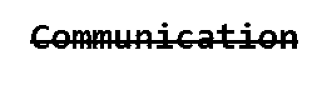

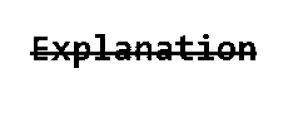

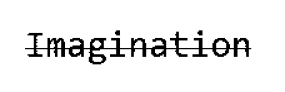

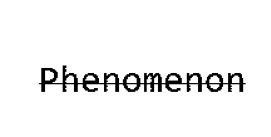

In [64]:
## Preprocessing:
binary_images=[]
for img in images:
  gray_img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
  thresh = 175
  binary_image = cv2.threshold(gray_img, 0, 255, cv2.THRESH_BINARY | cv2.THRESH_OTSU)[1]
  binary_images.append(binary_image)
# im_bin = cv2.threshold(gray_img, 0, 255, cv2.THRESH_BINARY_INV | cv2.THRESH_OTSU)[1]
for img in binary_images:
  display(img)

In [65]:
import cv2


def preProcessing(myImage):
    grayImg = cv2.cvtColor(myImage, cv2.COLOR_BGR2GRAY)
    ret, thresh1 = cv2.threshold(grayImg, 0, 255, cv2.THRESH_OTSU | cv2.THRESH_BINARY_INV)
    print(f'The threshold valua applied to the image is: {ret} ')
    horizontal_kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (18, 18))
    dilation = cv2.dilate(thresh1, horizontal_kernel, iterations=1)
    horizontal_contours, hierarchy = cv2.findContours(dilation, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_NONE)
    im2 = myImage.copy()
    for cnt in horizontal_contours:
        x, y, w, h = cv2.boundingRect(cnt)
        rect = cv2.rectangle(im2, (x, y), (x + w, y + h), (255, 255, 255), 0)
    im2, vertical_contours = seg_word(rect)
    return im2, vertical_contours


def seg_word(wordImage):
    grayImg = cv2.cvtColor(wordImage, cv2.COLOR_BGR2GRAY)
    ret, thresh2 = cv2.threshold(grayImg, 0, 255, cv2.THRESH_OTSU | cv2.THRESH_BINARY_INV)
    # create a Structuring Element size of 8*10 for the vertical contouring
    vertical_kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (8, 10))
    # apply Dilation for once only
    dilation = cv2.dilate(thresh2, vertical_kernel, iterations=1)
    #fingd the vertical contours
    vertical_contours, hierarchy = cv2.findContours(dilation, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_NONE)
    word_img = wordImage.copy()
    # Run through each contour and extract the bounding box
    for cnt in vertical_contours:
        #computes the minimum rectangle
        x, y, w, h = cv2.boundingRect(cnt)
        # Draw a rectangular from the top left to the bottom right with the
        # given Coordinates x,y and height and width
        rect = cv2.rectangle(word_img, (x, y), (x + w, y + h), (0, 255, 0), 0)
    # apply a Character Segmentation and return the output Image

    return word_img, vertical_contours

The threshold valua applied to the image is: 132.0 


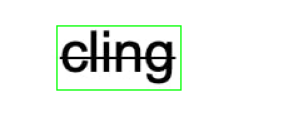

The threshold valua applied to the image is: 133.0 


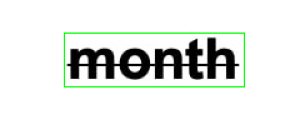

The threshold valua applied to the image is: 133.0 


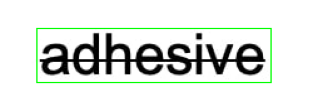

The threshold valua applied to the image is: 134.0 


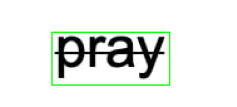

The threshold valua applied to the image is: 132.0 


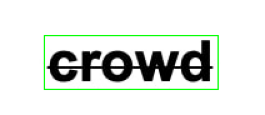

The threshold valua applied to the image is: 133.0 


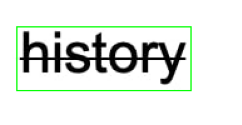

The threshold valua applied to the image is: 135.0 


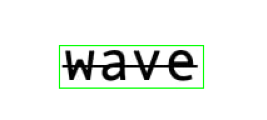

The threshold valua applied to the image is: 137.0 


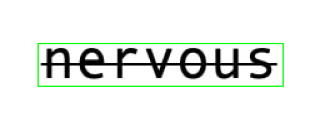

The threshold valua applied to the image is: 137.0 


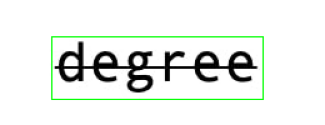

The threshold valua applied to the image is: 135.0 


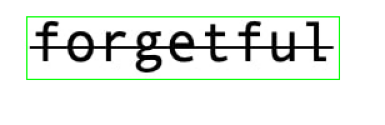

The threshold valua applied to the image is: 137.0 


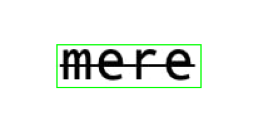

The threshold valua applied to the image is: 137.0 


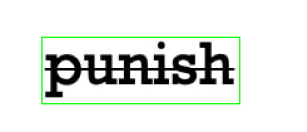

The threshold valua applied to the image is: 136.0 


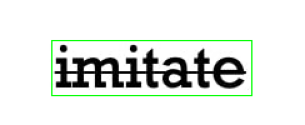

The threshold valua applied to the image is: 136.0 


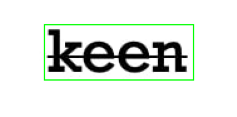

The threshold valua applied to the image is: 136.0 


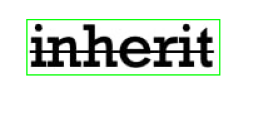

The threshold valua applied to the image is: 132.0 


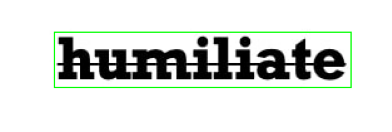

The threshold valua applied to the image is: 136.0 


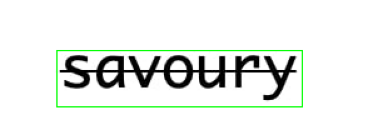

The threshold valua applied to the image is: 134.0 


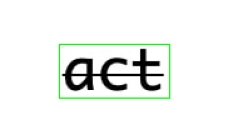

The threshold valua applied to the image is: 136.0 


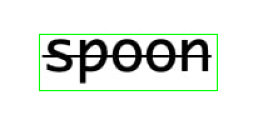

The threshold valua applied to the image is: 135.0 


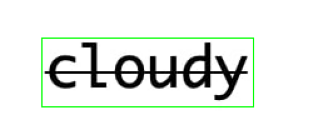

The threshold valua applied to the image is: 135.0 


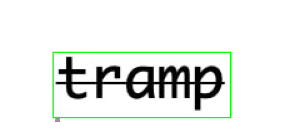

The threshold valua applied to the image is: 134.0 


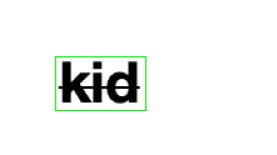

The threshold valua applied to the image is: 134.0 


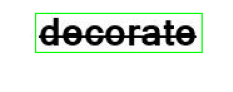

The threshold valua applied to the image is: 132.0 


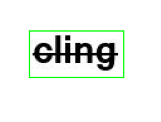

The threshold valua applied to the image is: 132.0 


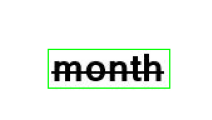

The threshold valua applied to the image is: 134.0 


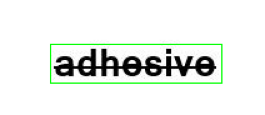

The threshold valua applied to the image is: 133.0 


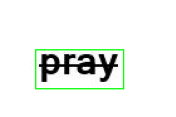

The threshold valua applied to the image is: 136.0 


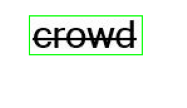

The threshold valua applied to the image is: 136.0 


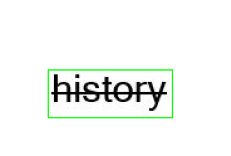

The threshold valua applied to the image is: 134.0 


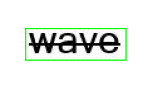

The threshold valua applied to the image is: 135.0 


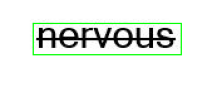

The threshold valua applied to the image is: 135.0 


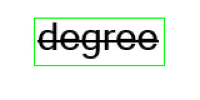

The threshold valua applied to the image is: 132.0 


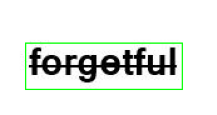

The threshold valua applied to the image is: 132.0 


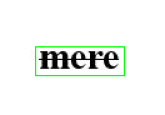

The threshold valua applied to the image is: 137.0 


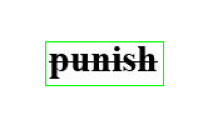

The threshold valua applied to the image is: 136.0 


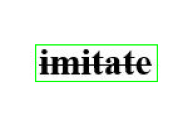

The threshold valua applied to the image is: 135.0 


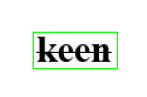

The threshold valua applied to the image is: 135.0 


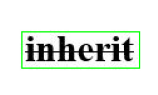

The threshold valua applied to the image is: 133.0 


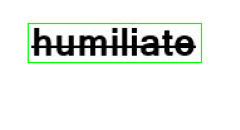

The threshold valua applied to the image is: 133.0 


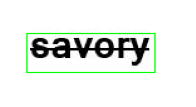

The threshold valua applied to the image is: 129.0 


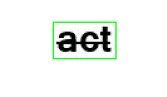

The threshold valua applied to the image is: 135.0 


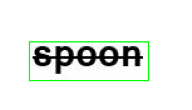

The threshold valua applied to the image is: 134.0 


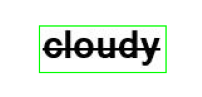

The threshold valua applied to the image is: 132.0 


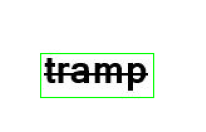

The threshold valua applied to the image is: 136.0 


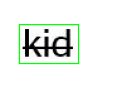

The threshold valua applied to the image is: 134.0 


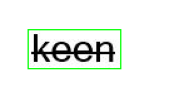

The threshold valua applied to the image is: 136.0 


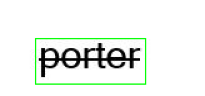

The threshold valua applied to the image is: 137.0 


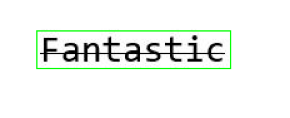

The threshold valua applied to the image is: 133.0 


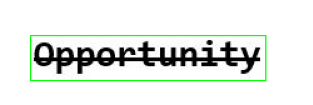

The threshold valua applied to the image is: 133.0 


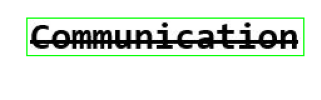

The threshold valua applied to the image is: 132.0 


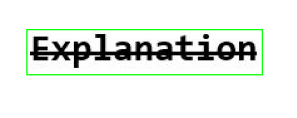

The threshold valua applied to the image is: 136.0 


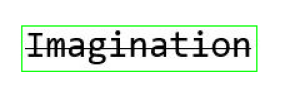

The threshold valua applied to the image is: 138.0 


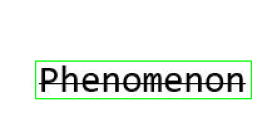

In [66]:
bbox = []
for img in images:
  im2, vertical_contours = preProcessing(img)
  for cnt in vertical_contours:
        #computes the minimum rectangle
        x, y, w, h = cv2.boundingRect(cnt)

        bbox.append([x,y,w,h])
  display(im2)

In [67]:
len(binary_images)

53

In [68]:
bbox

[[37, 13, 99, 51],
 [43, 18, 144, 43],
 [21, 15, 187, 43],
 [33, 18, 94, 42],
 [27, 20, 139, 43],
 [5, 13, 139, 51],
 [39, 28, 115, 34],
 [22, 27, 196, 34],
 [33, 21, 169, 50],
 [13, 5, 250, 50],
 [37, 28, 115, 34],
 [25, 22, 158, 53],
 [33, 24, 160, 44],
 [27, 12, 119, 44],
 [13, 8, 154, 44],
 [35, 18, 237, 44],
 [37, 32, 196, 45],
 [39, 27, 88, 43],
 [23, 19, 142, 45],
 [25, 22, 169, 55],
 [34, 34, 142, 52],
 [36, 37, 72, 43],
 [20, 3, 133, 31],
 [15, 17, 75, 37],
 [30, 31, 97, 31],
 [32, 27, 137, 31],
 [20, 32, 70, 31],
 [15, 5, 90, 31],
 [30, 48, 99, 38],
 [12, 15, 80, 25],
 [18, 11, 118, 25],
 [19, 6, 104, 38],
 [12, 26, 125, 37],
 [20, 29, 71, 23],
 [28, 25, 94, 35],
 [20, 28, 97, 29],
 [18, 18, 67, 29],
 [9, 17, 94, 29],
 [14, 11, 138, 31],
 [13, 19, 102, 31],
 [34, 10, 50, 29],
 [15, 25, 95, 31],
 [23, 13, 101, 37],
 [24, 35, 90, 35],
 [7, 12, 47, 31],
 [14, 16, 74, 31],
 [20, 23, 88, 36],
 [21, 17, 155, 30],
 [16, 20, 188, 36],
 [13, 6, 221, 30],
 [13, 16, 188, 36],
 [9, 13, 1

In [69]:
def detect_horizontal_line(word, x, y, w, h):
    arr = [0, 0]  # Initialize the array outside the loop

    for i in range(h):
        count = 0

        for j in range(w):
            if word[i][j] == 0:
                count += 1

        if count / w > 0.80:
            if i / h > 0.70:
                arr[1] = 1
            elif i / h < 0.70:
                arr[0] = 1


    return arr



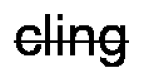

[1, 0]


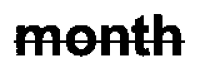

[1, 0]


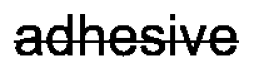

[1, 0]


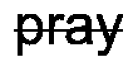

[1, 0]


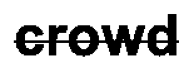

[1, 0]


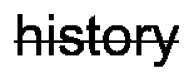

[1, 0]


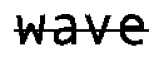

[1, 0]


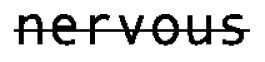

[1, 0]


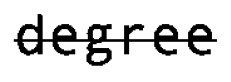

[1, 0]


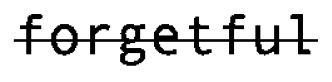

[1, 0]


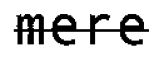

[1, 0]


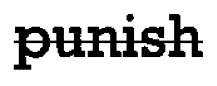

[1, 0]


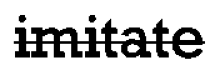

[1, 0]


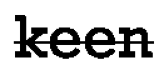

[1, 0]


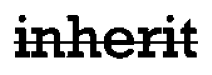

[1, 0]


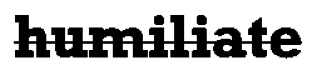

[1, 1]


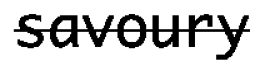

[1, 0]


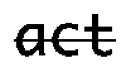

[1, 0]


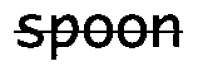

[1, 0]


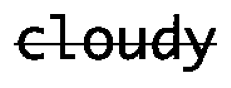

[1, 0]


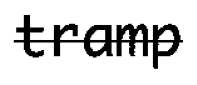

[1, 0]


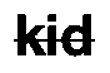

[1, 0]


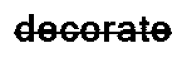

[1, 0]


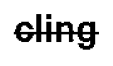

[1, 0]


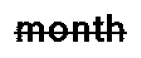

[1, 0]


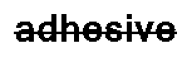

[1, 0]


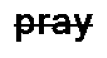

[1, 0]


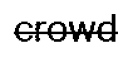

[1, 0]


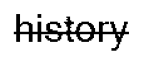

[1, 0]


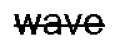

[1, 0]


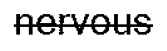

[1, 0]


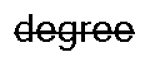

[1, 0]


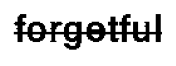

[1, 0]


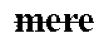

[1, 0]


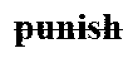

[1, 0]


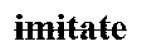

[1, 0]


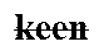

[1, 0]


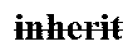

[1, 0]


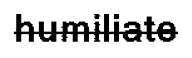

[1, 0]


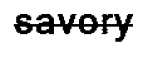

[1, 0]


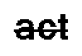

[1, 0]


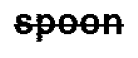

[1, 0]


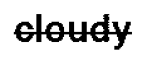

[1, 0]


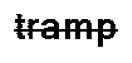

[1, 0]


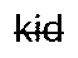

[1, 0]


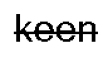

[1, 0]


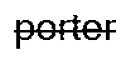

[1, 0]


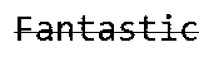

[1, 0]


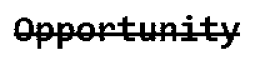

[1, 0]


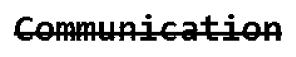

[1, 0]


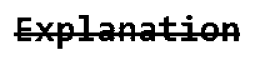

[1, 0]


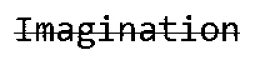

[1, 0]


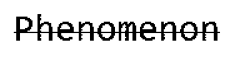

[1, 0]


In [70]:
# Iterate through each bbox : ideally each box should contain only one word
words = []
underline_words = []
strike_words = []
both = []
test = []
zero = []


for i in range(len(bbox)):
    word_dim = bbox[i]
    x, y, w, h = word_dim[0],word_dim[1], word_dim[2],word_dim[3]
    word = binary_images[i][y:y+h, x:x+w]
    display(word)
    z = detect_horizontal_line(word, x,y,w,h)

    print(z)
    temp = [word_dim,z]
    test.append(temp)
    test.append(z)
    if(z[0] == 1 and z[1] == 0):
        strike_words.append(word)
    if(z[1] == 1 and z[0] == 0):
      underline_words.append(word)
    if((z[0] == 1) and (z[1]==1)):
      both.append(word)
    if((z[0] == 0) and (z[1]==0)):
      zero.append(word)
    words.append(word)

In [71]:
test

[[[37, 13, 99, 51], [1, 0]],
 [1, 0],
 [[43, 18, 144, 43], [1, 0]],
 [1, 0],
 [[21, 15, 187, 43], [1, 0]],
 [1, 0],
 [[33, 18, 94, 42], [1, 0]],
 [1, 0],
 [[27, 20, 139, 43], [1, 0]],
 [1, 0],
 [[5, 13, 139, 51], [1, 0]],
 [1, 0],
 [[39, 28, 115, 34], [1, 0]],
 [1, 0],
 [[22, 27, 196, 34], [1, 0]],
 [1, 0],
 [[33, 21, 169, 50], [1, 0]],
 [1, 0],
 [[13, 5, 250, 50], [1, 0]],
 [1, 0],
 [[37, 28, 115, 34], [1, 0]],
 [1, 0],
 [[25, 22, 158, 53], [1, 0]],
 [1, 0],
 [[33, 24, 160, 44], [1, 0]],
 [1, 0],
 [[27, 12, 119, 44], [1, 0]],
 [1, 0],
 [[13, 8, 154, 44], [1, 0]],
 [1, 0],
 [[35, 18, 237, 44], [1, 1]],
 [1, 1],
 [[37, 32, 196, 45], [1, 0]],
 [1, 0],
 [[39, 27, 88, 43], [1, 0]],
 [1, 0],
 [[23, 19, 142, 45], [1, 0]],
 [1, 0],
 [[25, 22, 169, 55], [1, 0]],
 [1, 0],
 [[34, 34, 142, 52], [1, 0]],
 [1, 0],
 [[36, 37, 72, 43], [1, 0]],
 [1, 0],
 [[20, 3, 133, 31], [1, 0]],
 [1, 0],
 [[15, 17, 75, 37], [1, 0]],
 [1, 0],
 [[30, 31, 97, 31], [1, 0]],
 [1, 0],
 [[32, 27, 137, 31], [1, 0]],
 [1, 

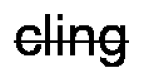

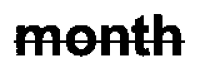

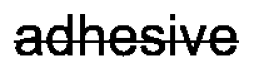

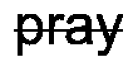

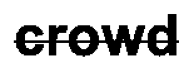

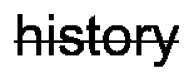

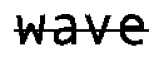

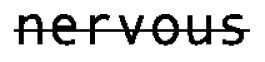

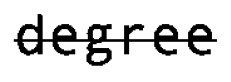

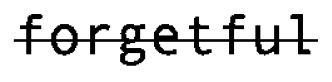

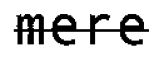

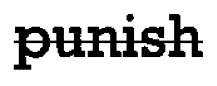

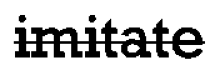

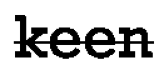

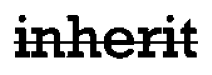

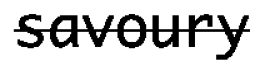

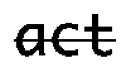

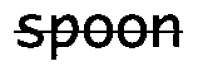

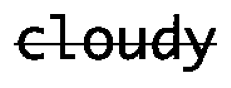

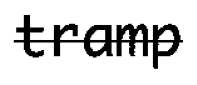

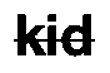

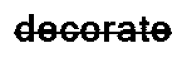

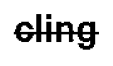

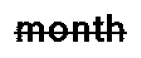

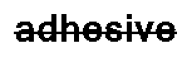

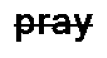

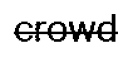

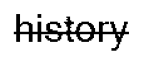

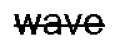

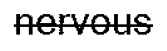

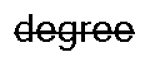

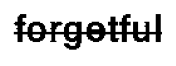

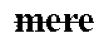

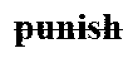

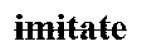

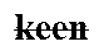

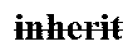

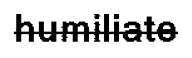

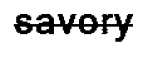

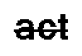

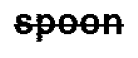

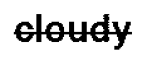

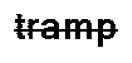

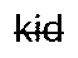

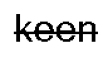

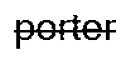

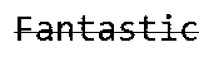

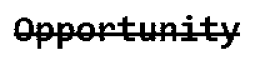

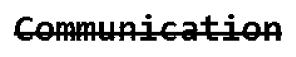

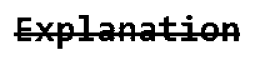

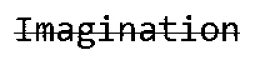

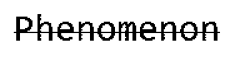

52


In [72]:
for i in range(len(strike_words)):
    display(strike_words[i])
print(len(strike_words))

In [73]:
for i in range(len(underline_words)):
    display(underline_words[i])
print(len(underline_words))

0


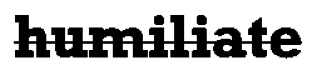

1


In [74]:
for i in range(len(both)):
    display(both[i])
print(len(both))

In [75]:
for i in range(len(zero)):
    display(zero[i])
print(len(zero))

0


In [76]:
# for i in range(len(words)):
#     display(words[i])
print(len(words))

53
